# 피부병 분류 모델 학습

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
import os
import pathlib
import urllib.request
import tarfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# 데이터 경로 설정
data_dir="dataset/SkinDisease/train";
data_dir=pathlib.Path(data_dir);

#클래스 및 이미지 개수 확인

classes=sorted([item.name for item in data_dir.glob("*/") if item.is_dir()]);
image_count=len(list(data_dir.glob("*/*.jpeg")));
print(f"데이터 클래스 개수: {classes}");
print(f"데이터 총 이미지 개수:{image_count}");




데이터 클래스 개수: ['Acne', 'Actinic_Keratosis', 'Benign_tumors', 'Bullous', 'Candidiasis', 'DrugEruption', 'Eczema', 'Infestations_Bites', 'Lichen', 'Lupus', 'Moles', 'Psoriasis', 'Rosacea', 'Seborrh_Keratoses', 'SkinCancer', 'Sun_Sunlight_Damage', 'Tinea', 'Unknown_Normal', 'Vascular_Tumors', 'Vasculitis', 'Vitiligo', 'Warts']
데이터 총 이미지 개수:13898


In [4]:
#각 클래스별 이미지 개수 확인
for class_name in classes:
    class_images=len(list(data_dir.glob(f"{class_name}/*")))
    print(f"{class_name}:{class_images}개 이미지")

Acne:593개 이미지
Actinic_Keratosis:748개 이미지
Benign_tumors:1093개 이미지
Bullous:504개 이미지
Candidiasis:248개 이미지
DrugEruption:547개 이미지
Eczema:1010개 이미지
Infestations_Bites:524개 이미지
Lichen:553개 이미지
Lupus:311개 이미지
Moles:361개 이미지
Psoriasis:820개 이미지
Rosacea:254개 이미지
Seborrh_Keratoses:455개 이미지
SkinCancer:693개 이미지
Sun_Sunlight_Damage:312개 이미지
Tinea:923개 이미지
Unknown_Normal:1651개 이미지
Vascular_Tumors:543개 이미지
Vasculitis:461개 이미지
Vitiligo:714개 이미지
Warts:580개 이미지


In [5]:
# 이미지 크기 및 배치 크기 설정
img_height = 224
img_width = 224
batch_size = 32

In [6]:
#훈련 데이터셋 생성
train_data=tf.keras.preprocessing.image_dataset_from_directory(
    str(data_dir),
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
);

#검증 데이터셋 생성
val_data=tf.keras.preprocessing.image_dataset_from_directory(
    str(data_dir),
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 13898 files belonging to 22 classes.
Using 11119 files for training.
Found 13898 files belonging to 22 classes.
Using 2779 files for validation.


In [7]:
#클래스 이름 확인
class_names=train_data.class_names;
print("클래스:", class_names);
num_classes=len(class_names);


클래스: ['Acne', 'Actinic_Keratosis', 'Benign_tumors', 'Bullous', 'Candidiasis', 'DrugEruption', 'Eczema', 'Infestations_Bites', 'Lichen', 'Lupus', 'Moles', 'Psoriasis', 'Rosacea', 'Seborrh_Keratoses', 'SkinCancer', 'Sun_Sunlight_Damage', 'Tinea', 'Unknown_Normal', 'Vascular_Tumors', 'Vasculitis', 'Vitiligo', 'Warts']


In [8]:
#데이터셋 성능 최적화
AUTOTUNE=tf.data.AUTOTUNE;
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE);
val_data=val_data.cache().prefetch(buffer_size=AUTOTUNE);


In [9]:
#데이터 증강 레이어 정의
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [9]:
#샘플 이미지 시각화
# plt.figure(figsize=(10,10));
# for images, labels in train_data.take(1):
#     for i in range(9):
#         plt.subplot(3,3,i+1)
#         plt.imshow(images[i].numpy().astype("uint8"));
#         plt.title(class_names[labels[i]])
#         plt.axis("off")
# plt.show();

In [10]:
#CNN 모델 구성
skin_model=tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
]);

d:\241223\aiProject2\.venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 모델 컴파일
skin_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [12]:
#모델 구조 출력
skin_model.summary();

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Early Stopping 콜백 설정
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
]

In [ ]:
# 모델 학습
epochs = 10
history = skin_model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 235s 398ms/step - accuracy: 0.1605 - loss: 2.8471 - val_accuracy: 0.2299 - val_loss: 2.5896
Epoch 2/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 125s 359ms/step - accuracy: 0.2217 - loss: 2.5930 - val_accuracy: 0.2609 - val_loss: 2.5090
Epoch 3/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 122s 352ms/step - accuracy: 0.2510 - loss: 2.5023 - val_accuracy: 0.2530 - val_loss: 2.4636
Epoch 4/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 128s 367ms/step - accuracy: 0.2622 - loss: 2.4290 - val_accuracy: 0.2548 - val_loss: 2.4073
Epoch 5/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 127s 365ms/step - accuracy: 0.2724 - loss: 2.3669 - val_accuracy: 0.2951 - val_loss: 2.3848
Epoch 6/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 128s 368ms/step - accuracy: 0.2804 - loss: 2.3441 - val_accuracy: 0.3062 - val_loss: 2.3091
Epoch 7/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 127s 364ms/step - accuracy: 0.3060 - loss: 2.2694 - val_accuracy: 0.2933 - val_loss: 2.3557
Epoch 8/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 127s 364ms/step - accuracy: 0.3113 -

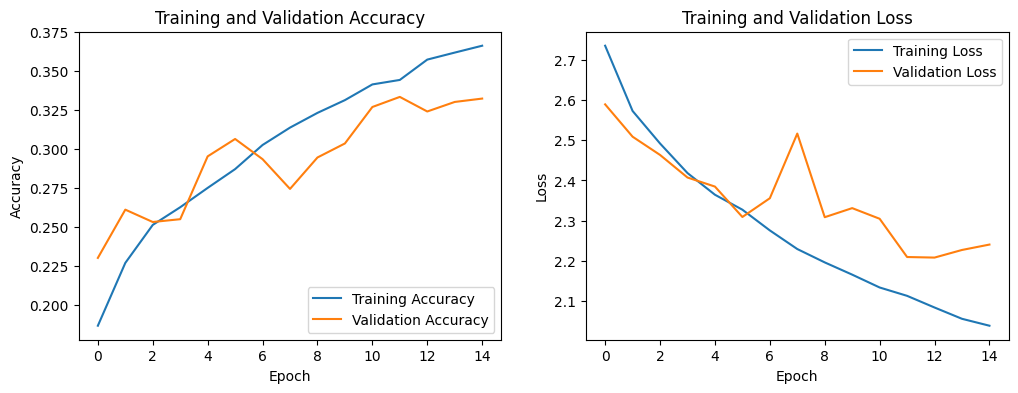

In [15]:
# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [16]:
# 모델 저장
skin_model.save('./model/skin_disease_classification_model2.h5')
print("모델이 'skin_disease_classification_model2.h5'로 저장되었습니다.")

모델이 'skin_disease_classification_model2.h5'로 저장되었습니다.


In [17]:
# 저장된 모델 불러오기
from tensorflow.keras.models import load_model

model_path = './model/skin_disease_classification_model2.h5'  # 저장된 모델 경로
loaded_model = load_model(model_path)
print("저장된 모델이 성공적으로 로드되었습니다.")

저장된 모델이 성공적으로 로드되었습니다.


In [18]:
# 저장된 모델을 활용한 이미지 예측 함수
def predict_skin_disease(img_path, model, class_names):
    """
    이미지 경로와 모델을 입력받아 예측 결과를 출력하고 이미지를 시각화하는 함수.

    Parameters:
        img_path (str): 예측할 이미지 파일 경로.
        model (tf.keras.Model): 저장된 모델.
        class_names (list): 클래스 이름 리스트.
    """
    # 이미지 로드 및 전처리
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # 배치 차원 추가

    # # 예측 수행
    predictions = skin_model.predict(img_array)
    # score = tf.nn.softmax(predictions[0])
    # # 예측 결과 출력
    # print(
    # "이 이미지는 '{}' ({:.2f}% 확률) 입니다."
    # .format(class_names[np.argmax(score)], 100 * np.max(score))
    # )
    
    # 확률 순으로 예측 결과를 정렬
    top_3_idx = np.argsort(predictions[0])[-3:][::-1]  # 상위 3개 인덱스
    top_3_probs = predictions[0][top_3_idx]  # 해당 인덱스의 확률
    top_3_classes = [class_names[i] for i in top_3_idx]  # 해당 인덱스의 클래스 이름

    # 상위 3개 예측 결과 출력
    print("상위 3개 예측 결과:")
    for i in range(3):
        print(f"{i+1}: {top_3_classes[i]} (확률: {top_3_probs[i]*100:.2f}%)")

    # 이미지 시각화
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [19]:
# 테스트 이미지 경로
test_image_path = 'dataset/SkinDisease/test/Lupus/lupus-chronic-cutaneous-96.jpeg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
상위 3개 예측 결과:
1: SkinCancer (확률: 18.81%)
2: Benign_tumors (확률: 13.55%)
3: Psoriasis (확률: 13.34%)


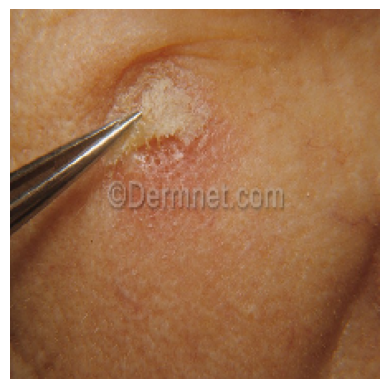

In [20]:
#예측 실행
predict_skin_disease(test_image_path, load_model, class_names);

#gradio 인터페이스 만들기

In [1]:
import pathlib
# 데이터 경로 설정
data_dir="dataset/SkinDisease/train";
data_dir=pathlib.Path(data_dir);

#클래스 및 이미지 개수 확인

classes=sorted([item.name for item in data_dir.glob("*/") if item.is_dir()]);
print(classes);
class_names=classes;

['Acne', 'Actinic_Keratosis', 'Benign_tumors', 'Bullous', 'Candidiasis', 'DrugEruption', 'Eczema', 'Infestations_Bites', 'Lichen', 'Lupus', 'Moles', 'Psoriasis', 'Rosacea', 'Seborrh_Keratoses', 'SkinCancer', 'Sun_Sunlight_Damage', 'Tinea', 'Unknown_Normal', 'Vascular_Tumors', 'Vasculitis', 'Vitiligo', 'Warts']


In [6]:
import tensorflow as tf
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing import image
from IPython.core.display import display, HTML

# 모델 로드
model = tf.keras.models.load_model('model/skin_disease_classification_model2.h5')

# 이미지 예측 함수
def predict_image(img):
    # 이미지는 PIL 이미지 객체로 넘어옴 (Gradio에서 전달된 이미지)
    img = img.resize((224, 224))  # 모델에 맞게 이미지 크기 변경
    
    # 이미지를 numpy 배열로 변환하고 정규화
    img_array = np.array(img) / 255.0  # 0~255 -> 0~1로 정규화
    img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가 (모델에 맞게)

    # 예측
    predictions = model.predict(img_array)
    
    # 예측된 확률 값 얻기
    class_probabilities = predictions[0]  # 예측된 확률 값 (배열)

    # 상위 3개 클래스와 확률을 얻기 (내림차순 정렬)
    top_3_indices = np.argsort(class_probabilities)[-3:][::-1]  # 확률 내림차순으로 상위 3개 인덱스 얻기
    top_3_classes = [class_names[i] for i in top_3_indices]
    top_3_probabilities = [class_probabilities[i] for i in top_3_indices]
    
    return list(zip(top_3_classes, top_3_probabilities))

# Gradio 인터페이스 함수
def predict_image_with_top_3_classes(img):
    top_3 = predict_image(img)
    result="\n의심되는 질병은 다음과 같습니다.\n"
    result += "\n".join([f" {cls}: {prob*100:.2f}%" for cls, prob in top_3])  # 확률을 퍼센트로 출력
    
    return result

# Gradio 인터페이스 설정
iface = gr.Interface(
    fn=predict_image_with_top_3_classes,  # 예측 함수
    inputs=gr.Image(type="pil"),  # 이미지 업로드 (PIL 이미지 객체로 처리)
    outputs="text",  # 텍스트 출력 (예: 상위 3개의 클래스와 확률)
    live=True,  # 실시간 예측 결과 보기 (선택 사항)
)


d:\241223\aiProject2\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\human-10\AppData\Local\Temp\ipykernel_13468\780323959.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [ ]:
iface.launch()  # 웹 애플리케이션 실행

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [1]:
iface.close()

NameError: name 'iface' is not defined

#FastAPI 서버코드

In [2]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
from io import BytesIO
from PIL import Image
import numpy as np
import tensorflow as tf



In [7]:
#FastAPI 앺 생성
app=FastAPI()

#학습된 모델 로드
model=tf.keras.models.load_model("model/skin_disease_classification_model2.h5")

@app.post("/predict")
async def predict(file:UploadFile=File()):
    try:
        #파일을 바이트로 읽어 PIL 이미지로 변환
        img_bytes=await file.read()
        img=Image.open(BytesIO(img_bytes))
        
        #예측수행
        predictions=predict_image_with_top_3_classes(img)
        
        #예측한 결과 반환
        return JSONResponse(predictions)
    except Exception as e:
        return JSONResponse(status_code=400, content={"error":str(e)})